In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [2]:
datadir = '/home/pdcg/Documents/post_process_routines/'
simulation = 'iso_aur_surfdens/'
s = h5py.File(datadir+simulation+'snapdir_005/snapshot_005.0.hdf5', 'r')

In [3]:
data = np.loadtxt(datadir+simulation+'oneclustershocks.txt')

In [4]:
time = s['Header'].attrs['Time']
unit_time = s['Header'].attrs['UnitLength_in_cm']/s['Header'].attrs['UnitVelocity_in_cm_per_s']
unit_mass = s['Header'].attrs['UnitMass_in_g']
gyr = 3.15569e16
solarmass = 1.989e33

In [5]:
time = data[:,0]
init_mass = data[:,1]
tensor_eigenvalues = data[:,2:]

In [6]:
time_gyr = time*unit_time/gyr
tensor_gyr_2 = tensor_eigenvalues * (gyr/unit_time)**2
init_mass = init_mass*unit_mass/solarmass

In [7]:
unique, counts = np.unique(init_mass, return_counts=True)
idx = np.argsort(counts)

In [8]:
mass = unique[idx[-1]]
mask = init_mass == mass
time_gyr_unique = time_gyr[mask]
tensor_gyr_2_unique = tensor_gyr_2[mask]

[Text(0.5, 0, 'Time [Gyr]'),
 Text(0, 0.5, '$T_{ij}$ eigenvalues [Gyr$^{-2}$]'),
 None]

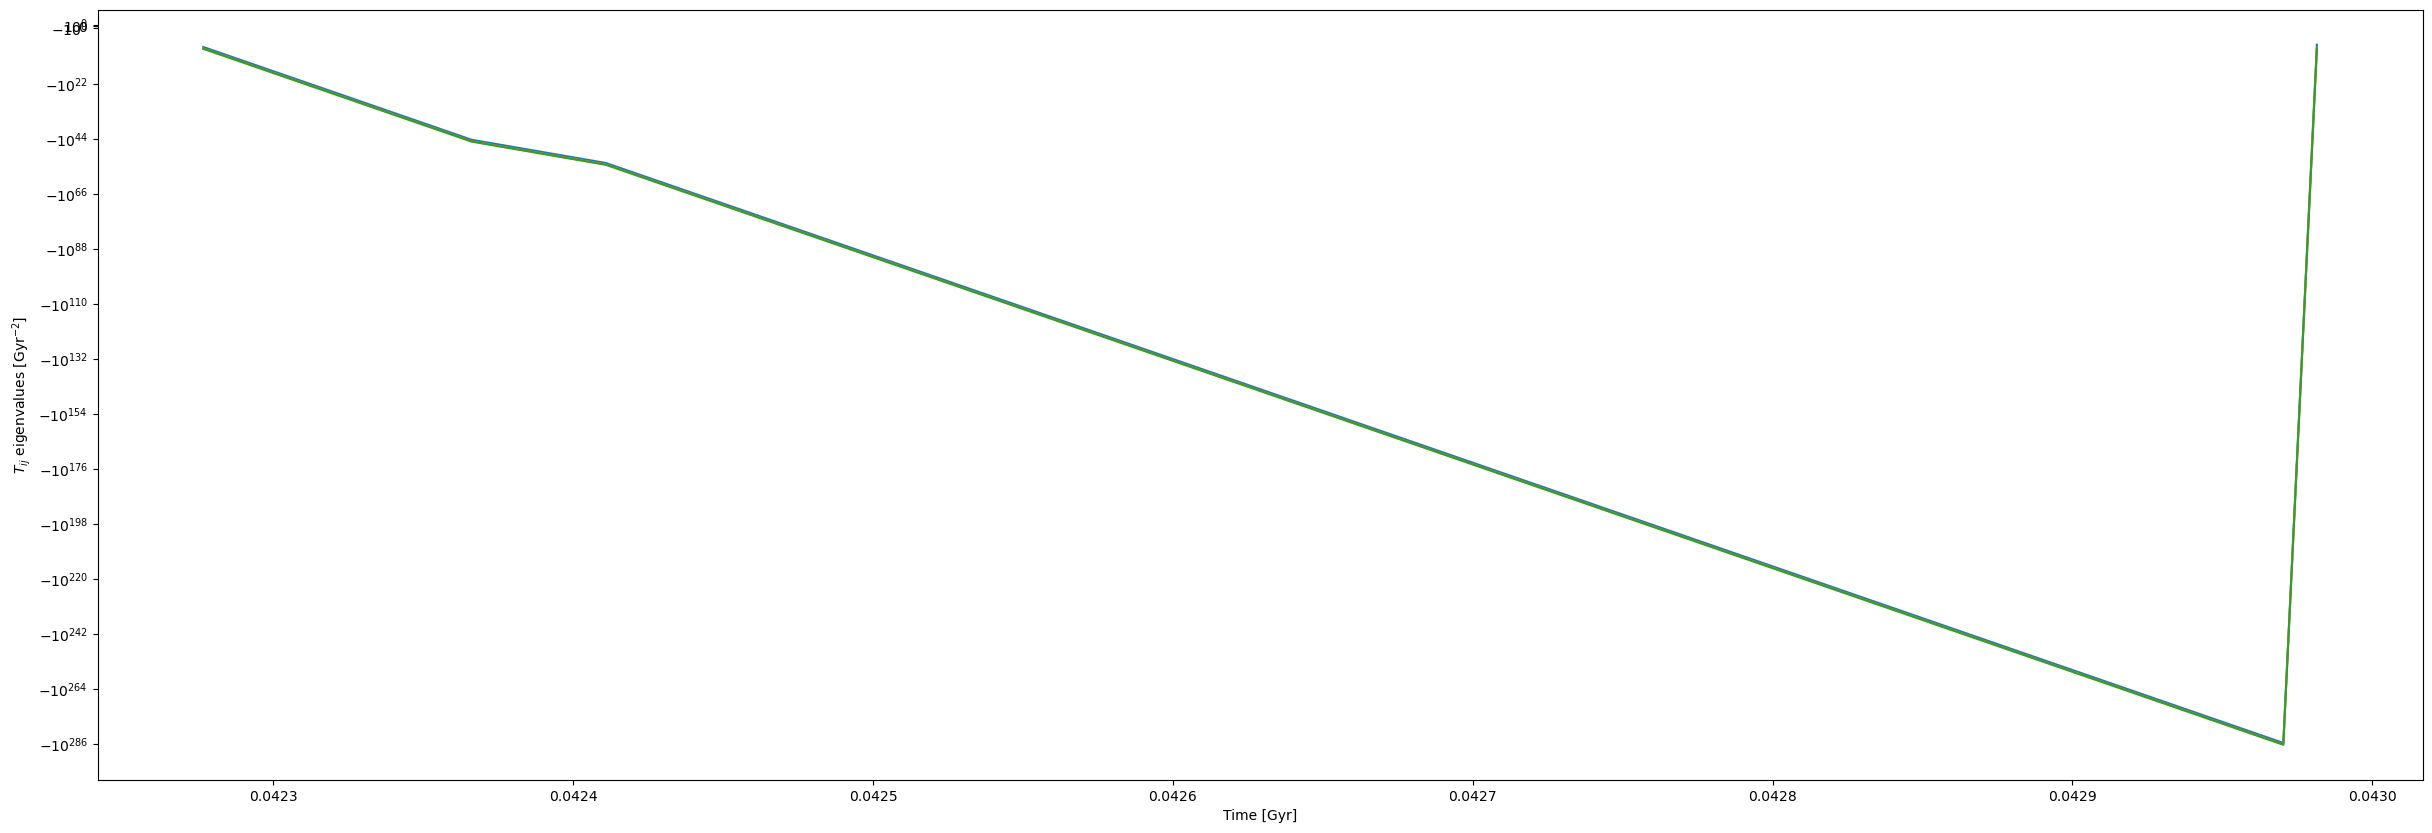

In [9]:
fig, ax = plt.subplots(1,1, figsize=(30,10))
for i in range(tensor_gyr_2_unique.shape[1]):
  ax.plot(time_gyr_unique[np.argsort(time_gyr_unique)], tensor_gyr_2_unique[:,i][np.argsort(time_gyr_unique)])
ax.set(xlabel='Time [Gyr]', ylabel=r'$T_{ij}$ eigenvalues [Gyr$^{-2}$]', yscale='symlog')

[Text(0.5, 0, 'Time [Gyr]'),
 Text(0, 0.5, '$T_{ij}$ eigenvalues [Gyr$^{-2}$]'),
 None,
 (0.5, 0.55)]

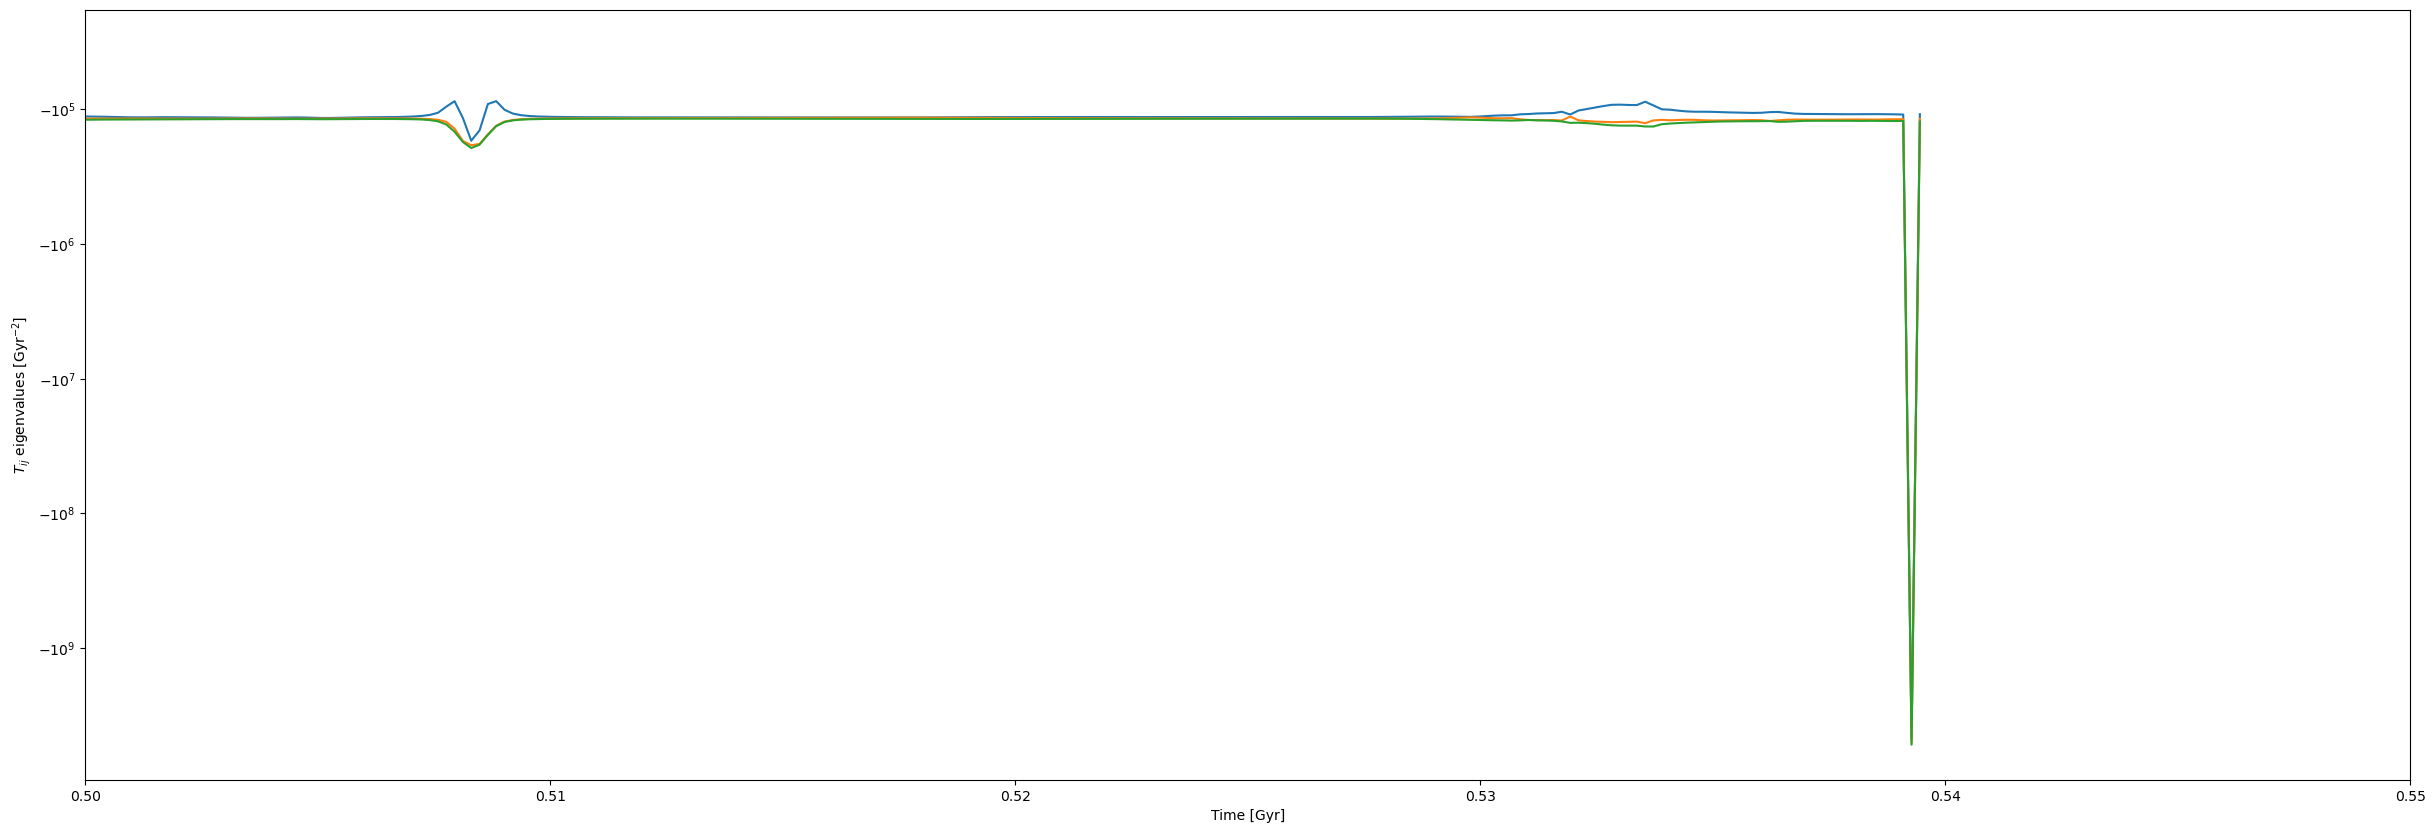

In [10]:
fig, ax = plt.subplots(1,1, figsize=(30,10))
for i in range(tensor_gyr_2_unique.shape[1]):
  ax.plot(time_gyr_unique[np.argsort(time_gyr_unique)], tensor_gyr_2_unique[:,i][np.argsort(time_gyr_unique)])
ax.set(xlabel='Time [Gyr]', ylabel=r'$T_{ij}$ eigenvalues [Gyr$^{-2}$]', yscale='symlog', xlim=(0.5, 0.55))

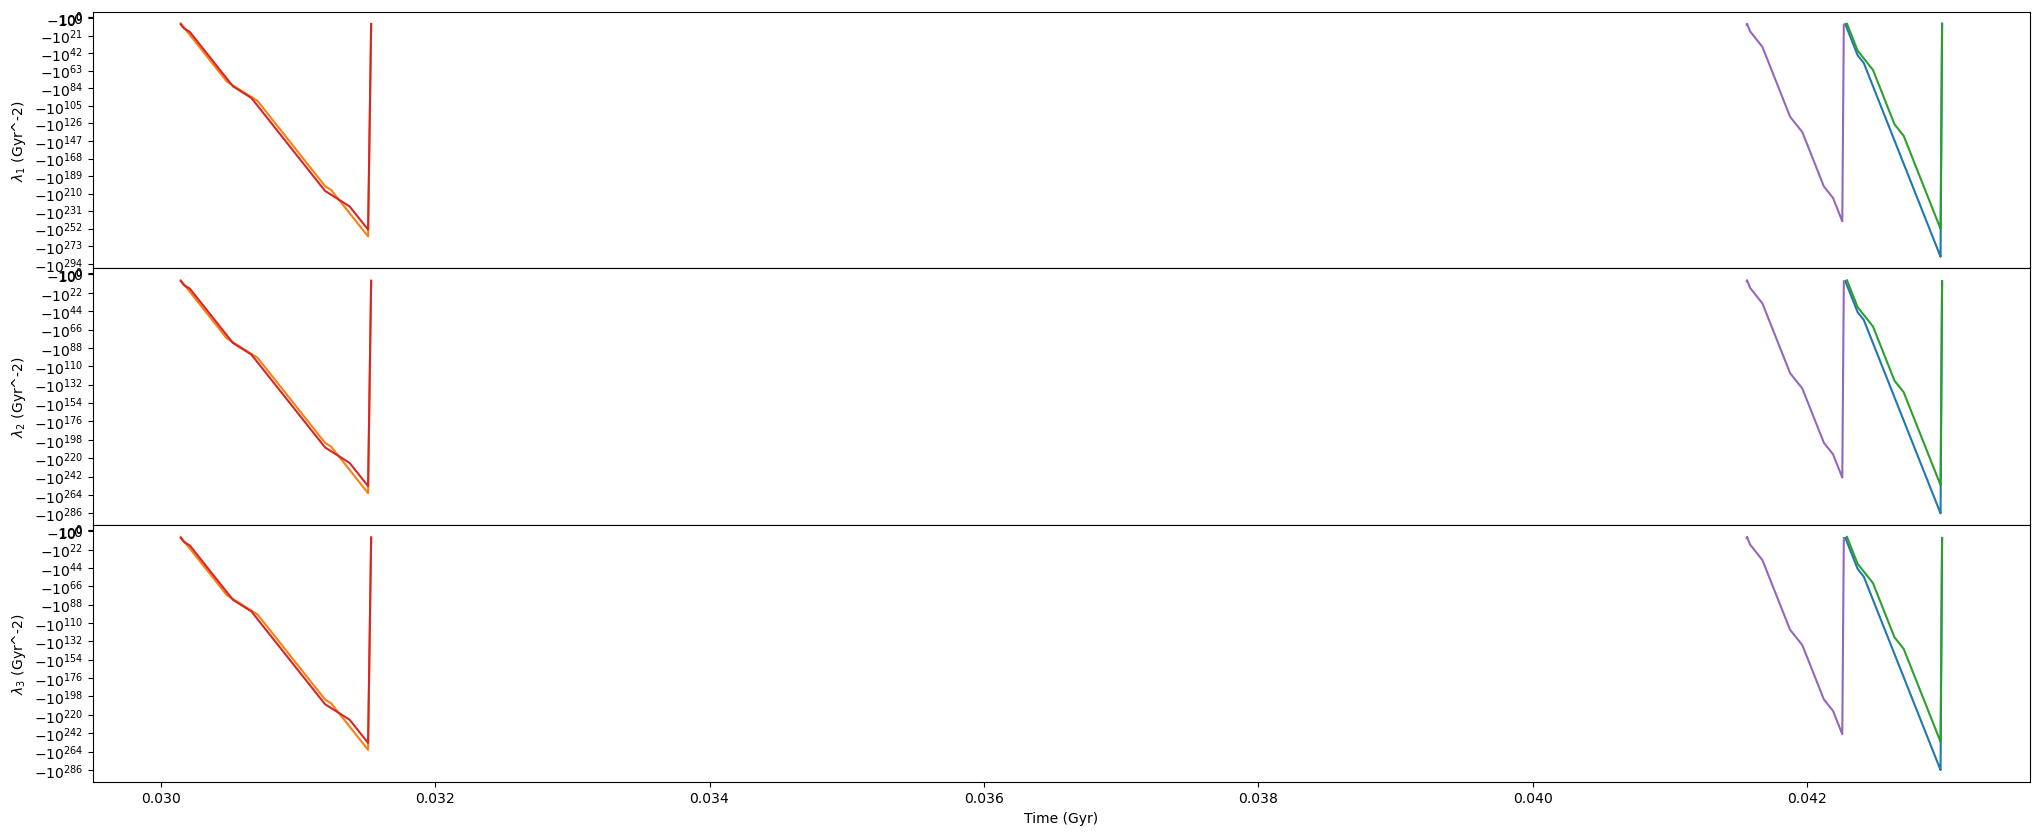

In [11]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(25, 10))
for i in range(5):
    mass = unique[idx[-1-i]]
    mask = init_mass == mass
    time_gyr_unique = time_gyr[mask]
    tensor_gyr_2_unique = tensor_gyr_2[mask]
    ax[0].plot(time_gyr_unique[np.argsort(time_gyr_unique)], tensor_gyr_2_unique[:,0][np.argsort(time_gyr_unique)])
    ax[1].plot(time_gyr_unique[np.argsort(time_gyr_unique)], tensor_gyr_2_unique[:,1][np.argsort(time_gyr_unique)])
    ax[2].plot(time_gyr_unique[np.argsort(time_gyr_unique)], tensor_gyr_2_unique[:,2][np.argsort(time_gyr_unique)])
        
ax[2].set(xlabel='Time (Gyr)')
ax[0].set(ylabel= r'$\lambda_1$ (Gyr^-2)',yscale='symlog')
ax[1].set(ylabel= r'$\lambda_2$ (Gyr^-2)',yscale='symlog')
ax[2].set(ylabel= r'$\lambda_3$ (Gyr^-2)',yscale='symlog')
plt.subplots_adjust(hspace=0)
# fig.text(.1, 0.5, 'Tidal tensor eigenvalues (Gyr^-2)', va='center', rotation='vertical')

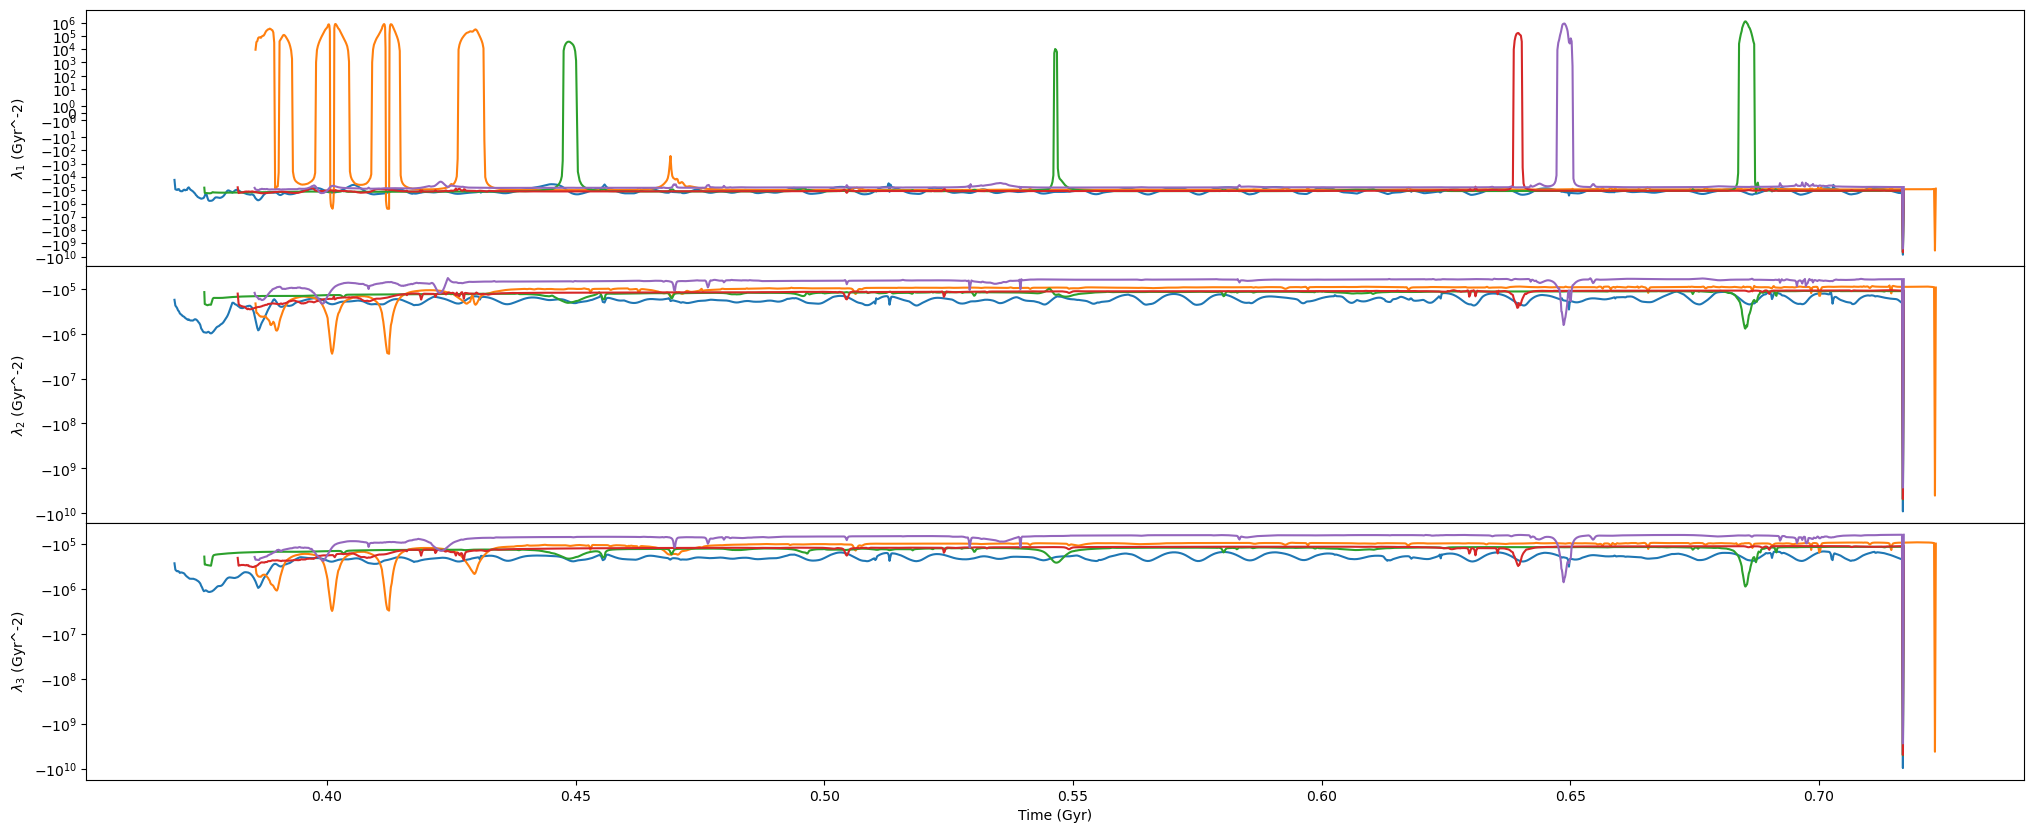

In [20]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(25, 10))
for i in range(5):
    mass = unique[idx[-1-i]]
    mask = init_mass == mass
    time_gyr_unique = time_gyr[mask]
    tensor_gyr_2_unique = tensor_gyr_2[mask]
    ax[0].plot(time_gyr_unique[np.argsort(time_gyr_unique)], tensor_gyr_2_unique[:,0][np.argsort(time_gyr_unique)])
    ax[1].plot(time_gyr_unique[np.argsort(time_gyr_unique)], tensor_gyr_2_unique[:,1][np.argsort(time_gyr_unique)])
    ax[2].plot(time_gyr_unique[np.argsort(time_gyr_unique)], tensor_gyr_2_unique[:,2][np.argsort(time_gyr_unique)])
        
ax[2].set(xlabel='Time (Gyr)')
ax[0].set(ylabel= r'$\lambda_1$ (Gyr^-2)',yscale='symlog')
ax[1].set(ylabel= r'$\lambda_2$ (Gyr^-2)',yscale='symlog')
ax[2].set(ylabel= r'$\lambda_3$ (Gyr^-2)',yscale='symlog')
plt.subplots_adjust(hspace=0)
# fig.text(.1, 0.5, 'Tidal tensor eigenvalues (Gyr^-2)', va='center', rotation='vertical')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pynbody

# Load simulation data
simulation = 'lvl5_test_cfe'
s = pynbody.load(simulation+'/snapdir_086/snapshot_086')

# Load shock evolution data
data = np.loadtxt(simulation+'/oneclustershocks.txt')

# Extract data
time = data[:,0]
init_mass = data[:,1]
tensor_eigenvalues = data[:,2:]

# Convert time column to Gyr
time_gyr = pynbody.analysis.cosmology.age(s,z = 1./time - 1.)

# Convert tensor data to Gyr^-2
gyr = 3.15576e16 # in s
unit_time = s.properties['UnitLength_in_cm']/s.properties['UnitVelocity_in_cm_per_s']
h = s.properties['h']
convert_factor = h**2/time**3 * (gyr/unit_time)**2 # to Gyr^-2

tensor_eigenvalues *= convert_factor[:, np.newaxis]

/home/pdcg/anaconda3/lib/python3.9/site-packages/pynbody/snapshot/gadgethdf.py:370: UserWarning: Masses are either stored in the header or have another dataset name; assuming the cosmological factor h**-1
  warnings.warn("Masses are either stored in the header or have another dataset name; assuming the cosmological factor %s" % units.h**-1)


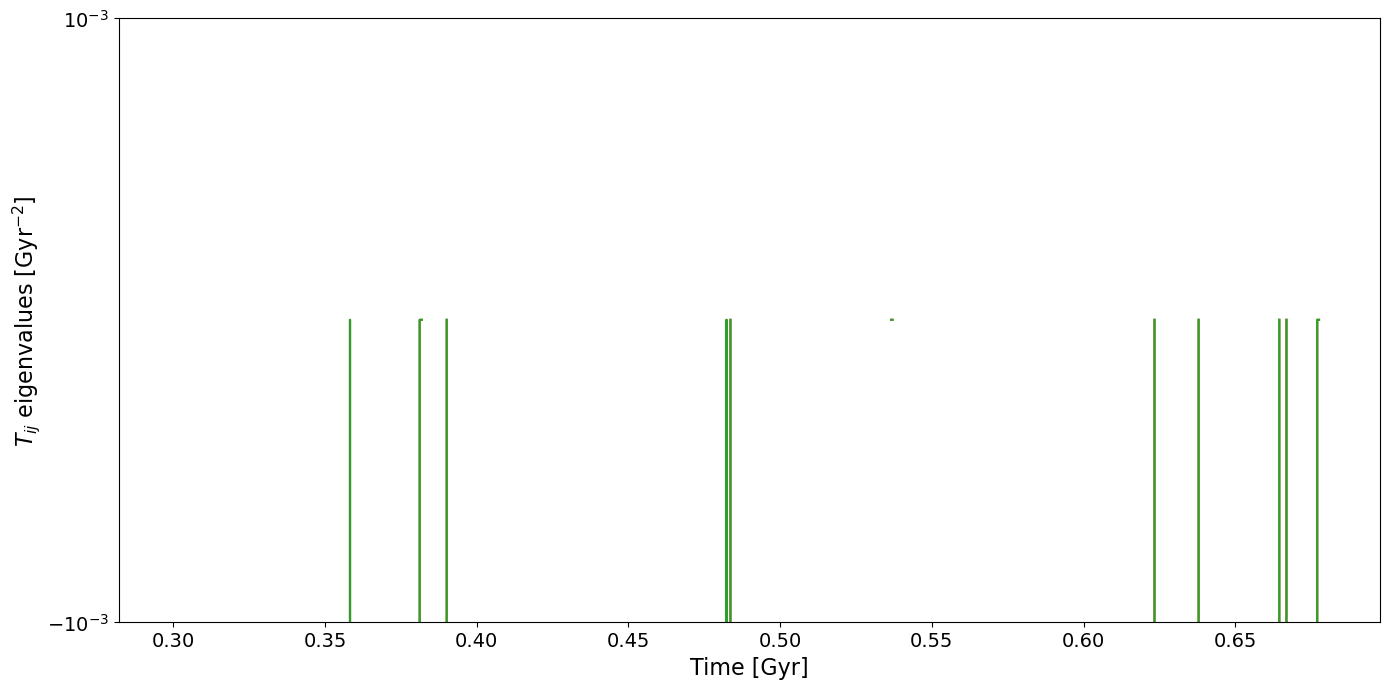

In [6]:
fig, ax = plt.subplots(1,1, figsize=(14,7))
for i in range(tensor_eigenvalues.shape[1]):
  ax.plot(time_gyr, tensor_eigenvalues[:,i])
ax.set_xlabel('Time [Gyr]', fontsize=16)
ax.set_ylabel(r'$T_{ij}$ eigenvalues [Gyr$^{-2}$]', fontsize=16)
ax.set_yscale('symlog')
# ax.set(xlim=(8,9), ylim=(-1e5, 1e4))
ax.tick_params(axis='both', which='both', labelsize=14)
plt.tight_layout()
# plt.savefig('shock_evolutions.png')

In [3]:
unique, counts = np.unique(init_mass, return_counts=True)
idx = np.argsort(counts)

In [4]:
mass = unique[idx[-1]]
mask = init_mass == mass
time_gyr_unique = time_gyr[mask]
tensor_gyr_2_unique = tensor_eigenvalues[mask]

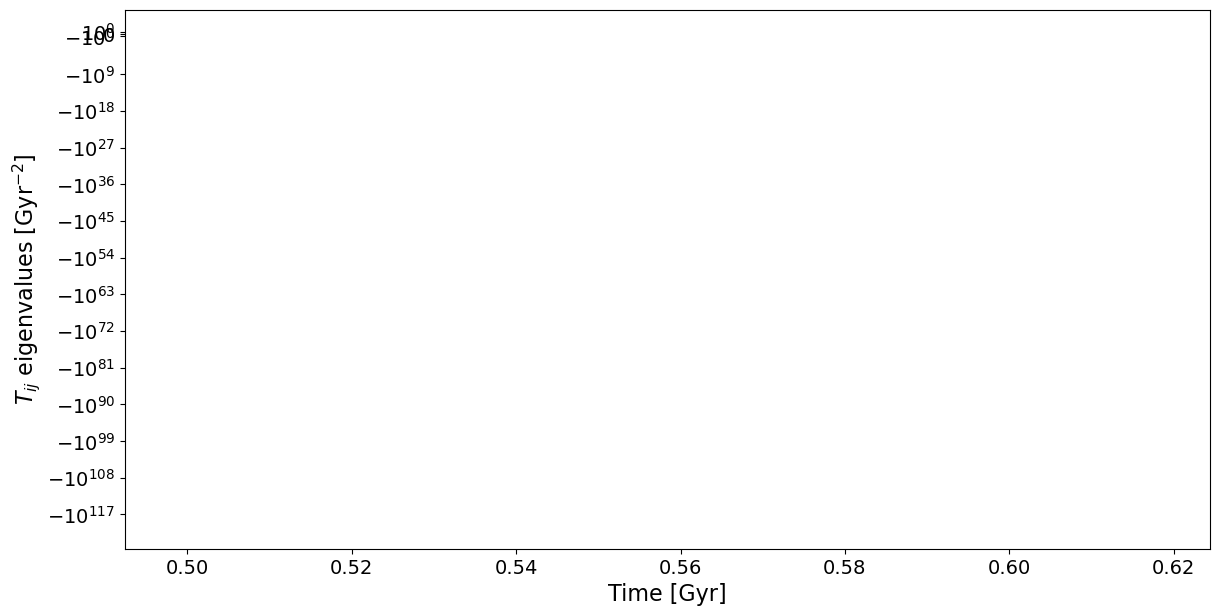

In [8]:
fig, ax = plt.subplots(1,1, figsize=(14,7))
for i in range(tensor_gyr_2_unique.shape[1]):
  ax.plot(time_gyr_unique[np.argsort(time_gyr_unique)], tensor_gyr_2_unique[:,i][np.argsort(time_gyr_unique)])
ax.set_xlabel('Time [Gyr]', fontsize=16)
ax.set_ylabel(r'$T_{ij}$ eigenvalues [Gyr$^{-2}$]', fontsize=16)
# ax.set(xlim=(8,9), ylim=(-5e4, 5e3))
ax.set(yscale='symlog')
ax.tick_params(axis='both', which='both', labelsize=14)


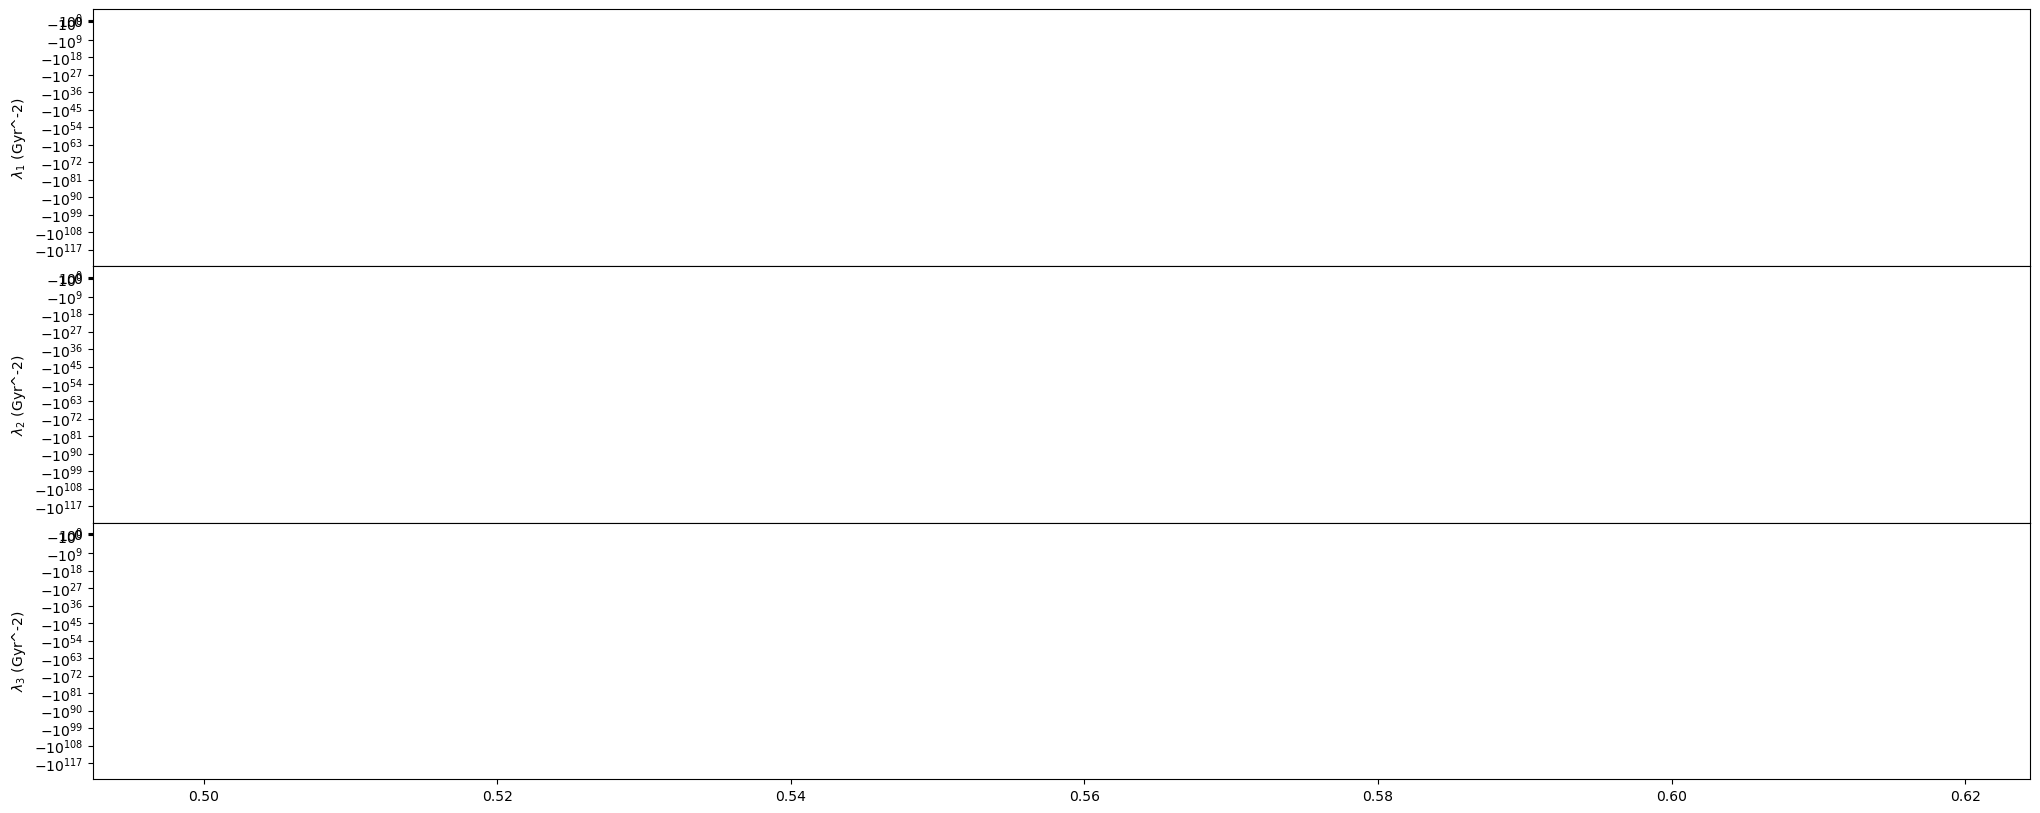

In [9]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(25, 10))
for i in range(1):
    mass = unique[idx[-1-i]]
    mask = init_mass == mass
    time_gyr_unique = time_gyr[mask]
    tensor_gyr_2_unique = tensor_eigenvalues[mask]
    ax[0].plot(time_gyr_unique[np.argsort(time_gyr_unique)], tensor_gyr_2_unique[:,0][np.argsort(time_gyr_unique)])
    ax[1].plot(time_gyr_unique[np.argsort(time_gyr_unique)], tensor_gyr_2_unique[:,1][np.argsort(time_gyr_unique)])
    ax[2].plot(time_gyr_unique[np.argsort(time_gyr_unique)], tensor_gyr_2_unique[:,2][np.argsort(time_gyr_unique)])
        
# ax[2].set(xlabel='Time (Gyr)', xlim=(12,13.5))
ax[0].set(ylabel= r'$\lambda_1$ (Gyr^-2)',yscale='symlog')
ax[1].set(ylabel= r'$\lambda_2$ (Gyr^-2)',yscale='symlog')
ax[2].set(ylabel= r'$\lambda_3$ (Gyr^-2)',yscale='symlog')
plt.subplots_adjust(hspace=0)